Inspecting the dataset:
   Unnamed: 0 VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0           0    adviser     32/60   125   256   6000   256     16    128  198
1           1     amdahl    470v/7    29  8000  32000    32      8     32  269
2           2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3           3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4           4     amdahl   470v/7c    29  8000  16000    32      8     16  132

Univariate Linear Regression Analysis:
Regression Equation: PRP = 0.01 * MMAX + -23.86
Coefficient (MMAX): 0.01
Intercept: -23.86
Mean Squared Error (MSE): 10969.75
R-squared (R2): 0.78

Visualizing the univariate linear regression results:


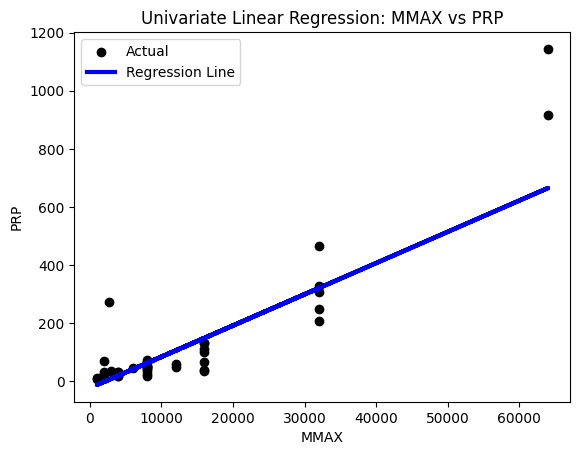


Assessing the assumptions of Linear Regression:


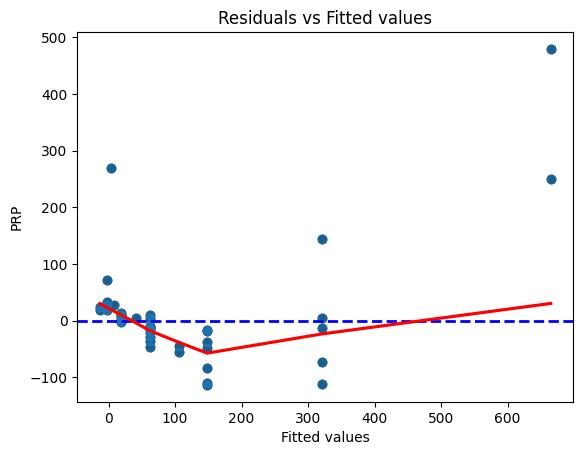


Multiple Linear Regression Analysis:

Regression Equation: PRP = 0.01 * MMAX + 1.11 * CACH + 0.03 * MYCT + -35.78
Coefficients - MMAX: 0.01, CACH: 1.11, MYCT: 0.03
Intercept: -35.78
Mean Squared Error (MSE) - Multiple Regression: 9721.61
R-squared (R2) - Multiple Regression: 0.81

Visualizing the multiple linear regression results:


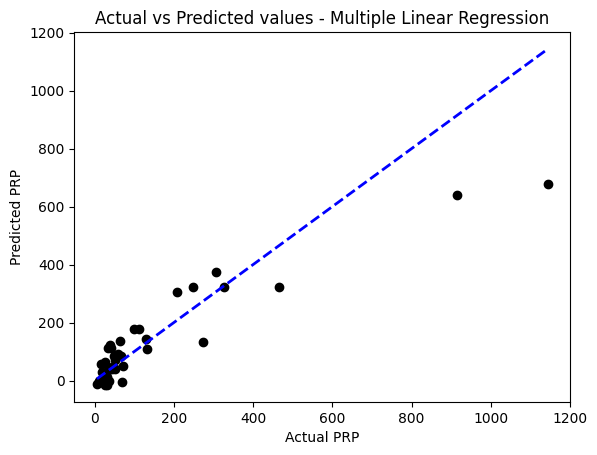


Correlation Matrix:
          MMAX     CACH      MYCT
MMAX  1.000000  0.53799 -0.378561
CACH  0.537990  1.00000 -0.321000
MYCT -0.378561 -0.32100  1.000000

Checking for multicollinearity among predictors:


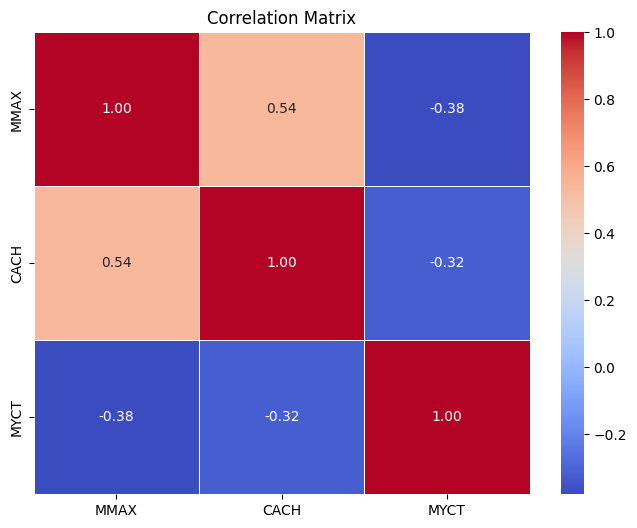

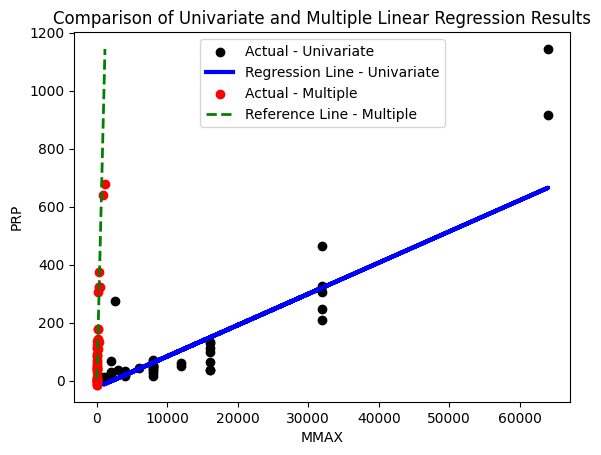


Quantitative Metrics:
Univariate Linear Regression - R-squared: 0.78, MSE: 10969.75
Multiple Linear Regression - R-squared: 0.81, MSE: 9721.61

Overall Verdict: Multiple Linear Regression model is considered better for the given situation.


In [ ]:
#21BCE1542
#MOHAMMAD SHAAD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Step 1- Loading the dataset
data_path = "/content/ComputerHardwareData.xlsx"  # Replace with your actual dataset path
dataset = pd.read_excel(data_path)  # Specify the sheet name if needed

# Display the first few rows of the dataset
print("Inspecting the dataset:")
print(dataset.head())

# Lets firstly do the Univariate Linear Regression Analysis
print("\nUnivariate Linear Regression Analysis:")
# Selecting 'MMAX' as the predictor and 'PRP' as the target variable
X_univariate = dataset[['MMAX']]
y_univariate = dataset['PRP']

# Splitting the dataset into training and testing sets for our convineance
X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate = train_test_split(X_univariate, y_univariate, test_size=0.2, random_state=42)

# linear regression model
model_univariate = LinearRegression()

# Training the model
model_univariate.fit(X_train_univariate, y_train_univariate)

# Making predictions on the test set
y_pred_univariate = model_univariate.predict(X_test_univariate)

# Calculating metrics for univariate analysis
mse_univariate = mean_squared_error(y_test_univariate, y_pred_univariate)
r2_univariate = r2_score(y_test_univariate, y_pred_univariate)

# Displaying regression equation and coefficients
print("Regression Equation: PRP = {:.2f} * MMAX + {:.2f}".format(model_univariate.coef_[0], model_univariate.intercept_))
print("Coefficient (MMAX): {:.2f}".format(model_univariate.coef_[0]))
print("Intercept: {:.2f}".format(model_univariate.intercept_))
print("Mean Squared Error (MSE): {:.2f}".format(mse_univariate))
print("R-squared (R2): {:.2f}".format(r2_univariate))

# Visualizing the results for univariate linear regression
print("\nVisualizing the univariate linear regression results:")
plt.scatter(X_test_univariate, y_test_univariate, color='black', label='Actual')
plt.plot(X_test_univariate, y_pred_univariate, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.title('Univariate Linear Regression: MMAX vs PRP')
plt.legend()
plt.show()

# Checking assumptions of Linear Regression
print("\nAssessing the assumptions of Linear Regression:")
# Residuals vs Fitted values plot
residuals_univariate = y_test_univariate - y_pred_univariate
plt.scatter(y_pred_univariate, residuals_univariate, color='black')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')

# Including a lowess curve for better visualization
sns.regplot(x=y_pred_univariate, y=residuals_univariate, lowess=True, line_kws={'color': 'red'})
plt.show()

# Multiple Linear Regression Analysis
print("\nMultiple Linear Regression Analysis:")
# Selecting 'MMAX', 'CACH', and 'MYCT' as predictors
X_multiple = dataset[['MMAX', 'CACH', 'MYCT']]
y_multiple = dataset['PRP']

# Splitting the dataset for multiple linear regression
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Creating a multiple linear regression model
model_multiple = LinearRegression()

# Training the multiple linear regression model
model_multiple.fit(X_train_multiple, y_train_multiple)

# Making predictions on the test set
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Calculating metrics for multiple linear regression
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

# Displaying regression equation and coefficients for multiple linear regression
coef_multiple = dict(zip(['MMAX', 'CACH', 'MYCT'], model_multiple.coef_))
print("\nRegression Equation: PRP = {:.2f} * MMAX + {:.2f} * CACH + {:.2f} * MYCT + {:.2f}".format(
    coef_multiple['MMAX'], coef_multiple['CACH'], coef_multiple['MYCT'], model_multiple.intercept_
))
print("Coefficients - MMAX: {:.2f}, CACH: {:.2f}, MYCT: {:.2f}".format(coef_multiple['MMAX'], coef_multiple['CACH'], coef_multiple['MYCT']))
print("Intercept: {:.2f}".format(model_multiple.intercept_))
print("Mean Squared Error (MSE) - Multiple Regression: {:.2f}".format(mse_multiple))
print("R-squared (R2) - Multiple Regression: {:.2f}".format(r2_multiple))

# Visualizing the results for multiple linear regression
print("\nVisualizing the multiple linear regression results:")
plt.scatter(y_test_multiple, y_pred_multiple, color='black')
plt.plot([min(y_test_multiple), max(y_test_multiple)], [min(y_test_multiple), max(y_test_multiple)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted values - Multiple Linear Regression')
plt.show()

# Checking for multicollinearity

# Check for multicollinearity
correlation_matrix = X_multi.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nChecking for multicollinearity among predictors:")

correlation_matrix = X_multiple.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Comparison of models


# Visualizing the univariate linear regression results
plt.scatter(X_test_univariate, y_test_univariate, color='black', label='Actual - Univariate')
print("\n")
plt.plot(X_test_univariate, y_pred_univariate, color='blue', linewidth=3, label='Regression Line - Univariate')
print("\n")

# Visualizing the multiple linear regression results
plt.scatter(y_test_multiple, y_pred_multiple, color='red', label='Actual - Multiple')
print("\n")

plt.plot([min(y_test_multiple), max(y_test_multiple)], [min(y_test_multiple), max(y_test_multiple)], linestyle='--', color='green', linewidth=2, label='Reference Line - Multiple')
print("\n")

plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.title('Comparison of Univariate and Multiple Linear Regression Results')
plt.legend()
plt.show()

# Print quantitative metrics
print("\nQuantitative Metrics:")
print("Univariate Linear Regression - R-squared: {:.2f}, MSE: {:.2f}".format(r2_univariate, mse_univariate))
print("Multiple Linear Regression - R-squared: {:.2f}, MSE: {:.2f}".format(r2_multiple, mse_multiple))

# Print overall verdict
if r2_multiple > r2_univariate and mse_multiple < mse_univariate:
    print("\nOverall Verdict: Multiple Linear Regression model is considered better for the given situation.")
else:
    print("\nOverall Verdict: Univariate Linear Regression model is considered better for the given situation.")

